# Solution for K-Means Clustering (Unsupervised Learning)
## Problem Statement:
You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: Adelie, Chinstrap, and Gentoo, so your task is to apply your data science skills to help them identify groups in the dataset.e dataset!

# CODE

In [18]:
# Import requried packages
import os
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
pwd

'C:\\Users\\OK'

In [20]:
# Load and Explore Data
# Read in the csv file 
penguins_df = pd.read_csv(r"C:\Users\OK\Documents\Self\I know Python\penguins.csv")
penguins_df.head()
penguins_df.info()
print(penguins_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


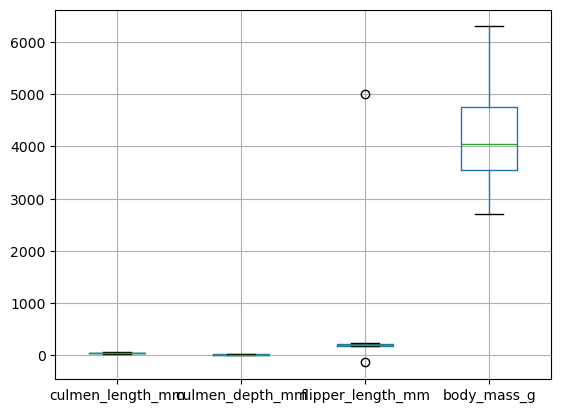

In [21]:
# Removing with null values and outliers
penguins_df.boxplot()  # 2 outliers for flipper length
plt.show()
penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

In [22]:
# Preprocessing data
## Create dummies for categorical variable
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
print("Shape of penguins_dummies: {}".format(df.shape))
df.head()

Shape of penguins_dummies: (333, 6)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [23]:
## Scaling data
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [24]:
# Executing PCA, Principle Component Analysis
## Number of components not set
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
## Optimal number of components set
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

C:\Users\OK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\OK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

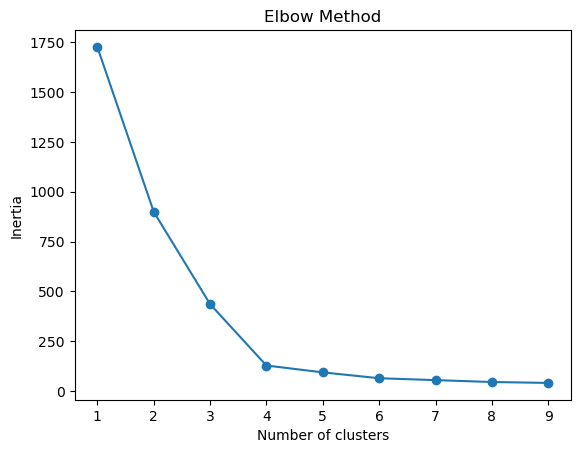

C:\Users\OK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [25]:
# Executing K-means clustering
inertia = []
## Discover the number of clusters (***WILL FORCE WARNING***)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)   
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4
## Execute the model with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


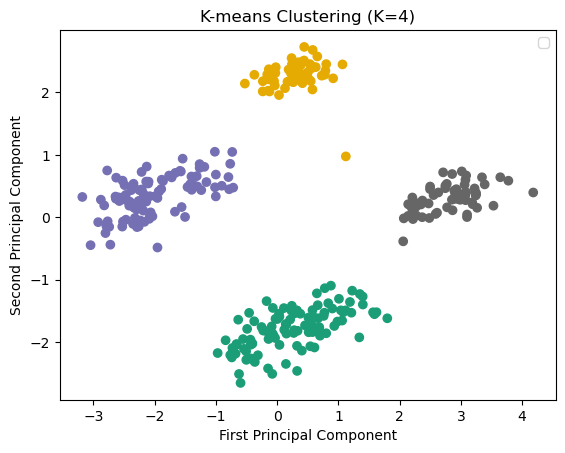

In [26]:
## Plot results of the PCA
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='Dark2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [27]:
# Reporting results
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
